<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/ML_Learning_101_Unsupervised_Learning_Density_Based_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept

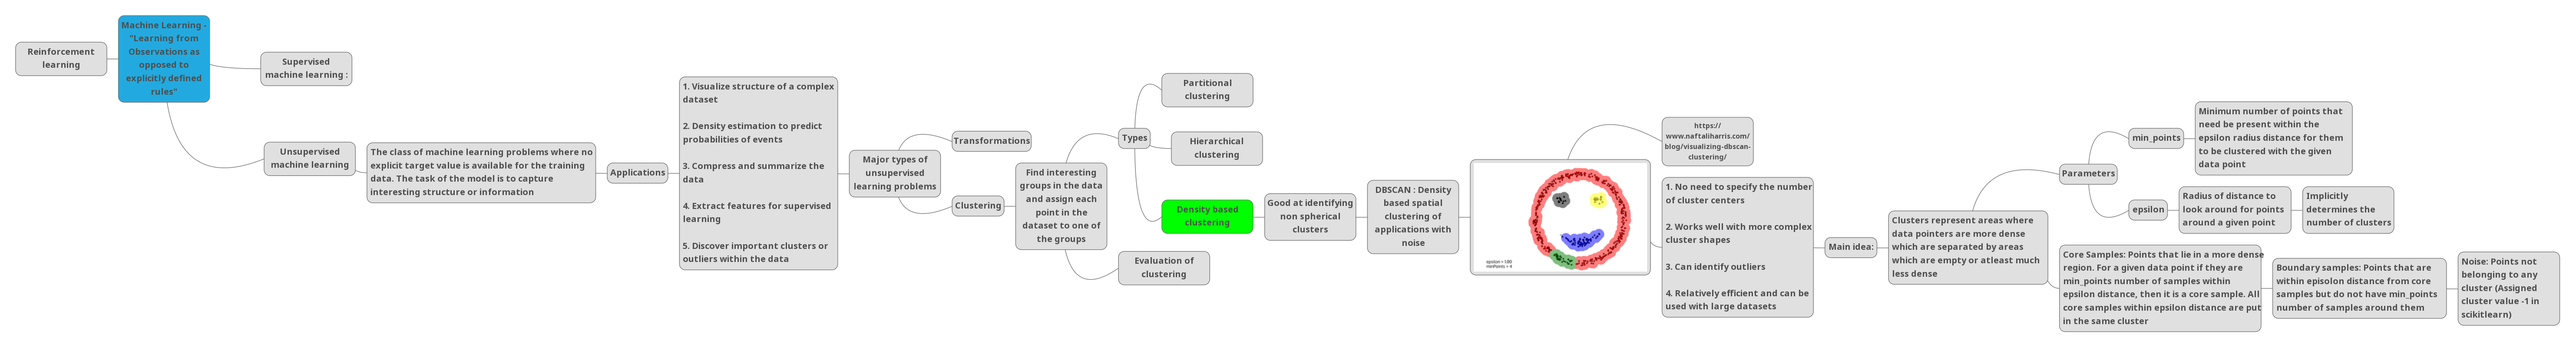

# Setup

In [95]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_circles,make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,silhouette_score,adjusted_mutual_info_score,adjusted_rand_score
from sklearn.cluster import DBSCAN,KMeans
from statistics import mode

# Case studies

## DBSCAN Clustering

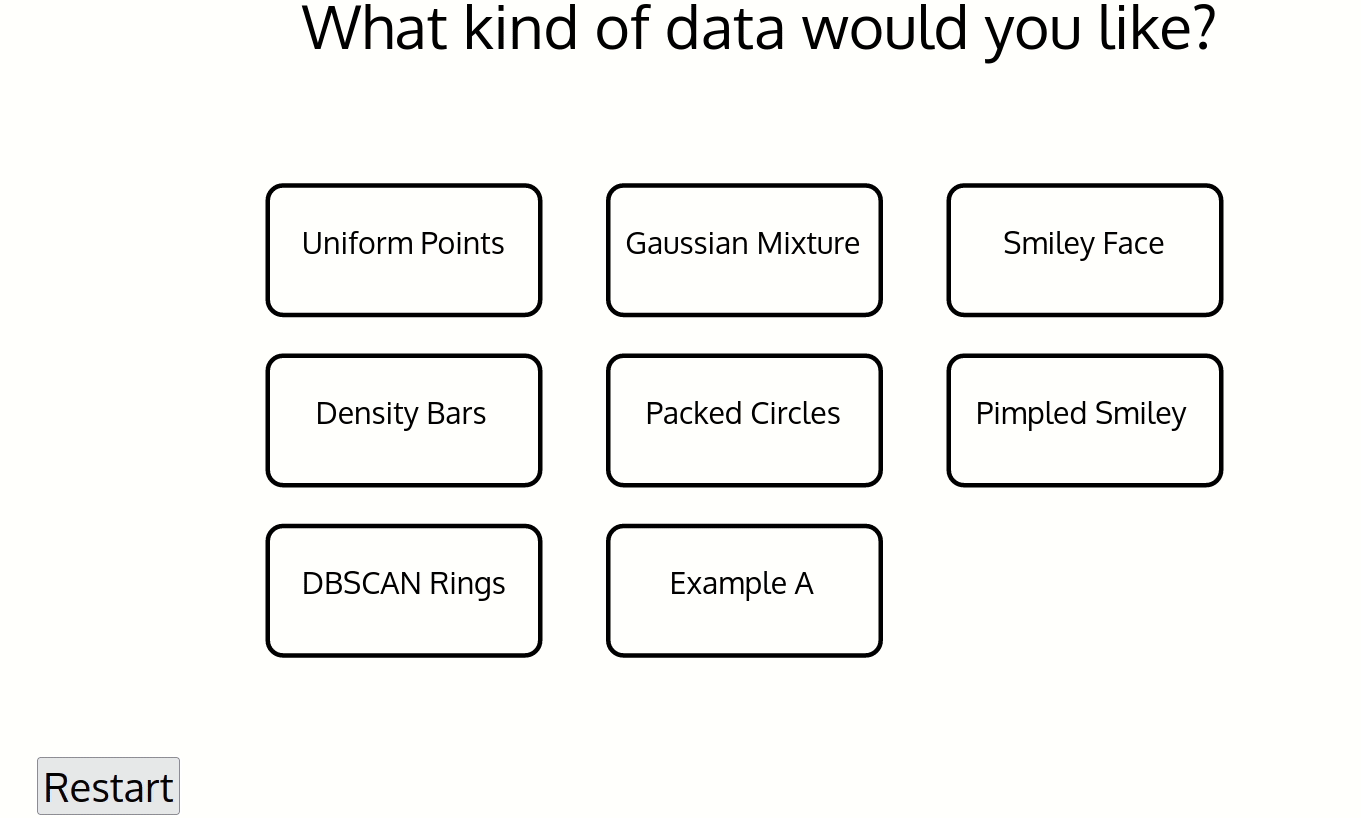

* Function to get several metrics computed for a given clustering

In [96]:
def get_perf_metrics(truelabels,predlabels,data):
  ARI_score = adjusted_rand_score(truelabels,predlabels)
  print("ARI Score = {:.2f}".format(ARI_score))
  silhouette = silhouette_score(data,predlabels)
  print("silhouette Score = {:.2f}".format(silhouette))
  mutual_info = adjusted_mutual_info_score(truelabels,predlabels)
  print("Adjusted mutual information Score = {:.2f}".format(mutual_info))

### Blobs

In [97]:
X_synth,y_synth = make_blobs(n_samples=25,random_state=9)

Text(0.5, 1.0, 'Dataset for DBSCAN Clustering')

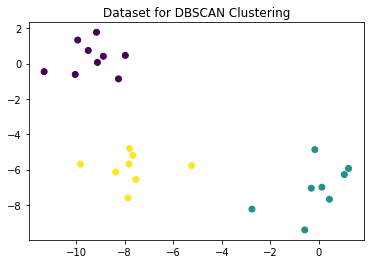

In [98]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=y_synth)
plt.title('Dataset for DBSCAN Clustering')

In [99]:
dbscan = DBSCAN(eps=2,min_samples=2)

In [100]:
dbscan_pred = dbscan.fit_predict(X_synth)

Class membership values:  [ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


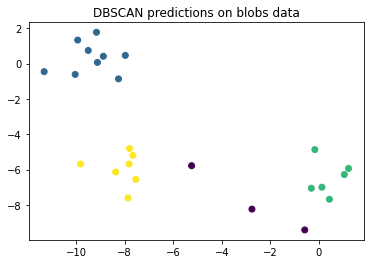

In [101]:
plt.scatter(X_synth[:,0],X_synth[:,1],c=dbscan_pred)

plt.title('DBSCAN predictions on blobs data')
print('Class membership values: ',dbscan_pred)

DBSCAN is nicely finding the clusters and ignoring the noisy points. 

### Circles

In [102]:
X_circles,y_circles = make_circles(n_samples=750,
                                   noise = 0.1,
                                   factor = 0.3)

Text(0.5, 1.0, 'Circles data')

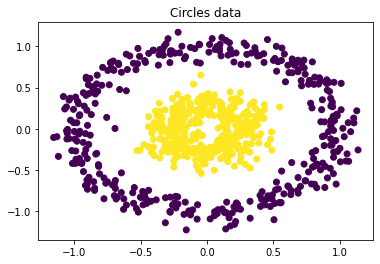

In [103]:
plt.scatter(X_circles[:,0],X_circles[:,1],c=y_circles)
plt.title("Circles data")

In [104]:
dbscan_circles = DBSCAN(eps = 0.15).fit_predict(X_circles)

Text(0.5, 1.0, 'DBSCAN on circles data')

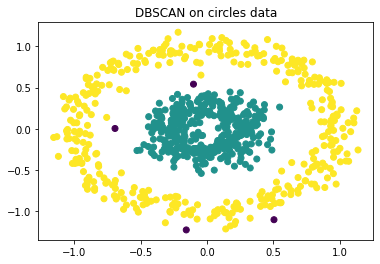

In [105]:
plt.scatter(X_circles[:,0],X_circles[:,1],c=dbscan_circles)
plt.title("DBSCAN on circles data")

In [106]:
get_perf_metrics(y_circles,dbscan_circles,X_circles)

ARI Score = 0.98
silhouette Score = 0.17
Adjusted mutual information Score = 0.96


#### Kmeans for comparison

In [107]:
kmeans_circles = KMeans(n_clusters=2,
                        random_state = 0)

In [108]:
kmeans_circles.fit(X_circles)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'kmeans on circles data')

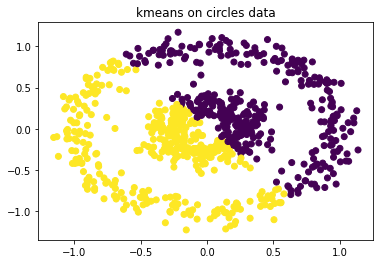

In [109]:
plt.scatter(X_circles[:,0],X_circles[:,1],c=kmeans_circles.labels_)
plt.title("kmeans on circles data")

In [110]:
get_perf_metrics(y_circles,kmeans_circles.labels_,X_circles)

ARI Score = -0.00
silhouette Score = 0.29
Adjusted mutual information Score = -0.00


### Moons

In [111]:
X_moons,y_moons = make_moons(n_samples = 750,
                             noise = 0.08,
                             random_state = 0)

Text(0.5, 1.0, 'Moons dataset')

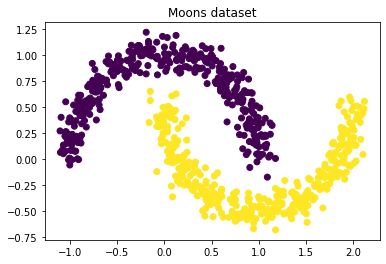

In [112]:
plt.scatter(X_moons[:,0],X_moons[:,1],c=y_moons)
plt.title('Moons dataset')

In [113]:
dbscan_moons = DBSCAN(eps=0.1).fit_predict(X_moons)

Text(0.5, 1.0, 'DBSCAN on Moons dataset')

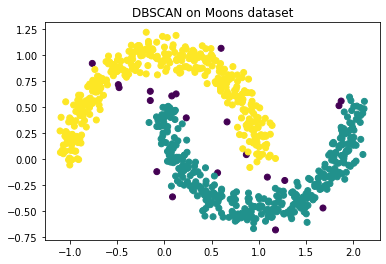

In [114]:
plt.scatter(X_moons[:,0],X_moons[:,1],c=dbscan_moons)
plt.title('DBSCAN on Moons dataset')

In [115]:
get_perf_metrics(y_circles,dbscan_circles,X_moons)

ARI Score = 0.98
silhouette Score = -0.02
Adjusted mutual information Score = 0.96


#### Kmeans for comparison

In [116]:
kmeans_moons = KMeans(n_clusters = 2).fit(X_moons)

Text(0.5, 1.0, 'kmeans on Moons dataset')

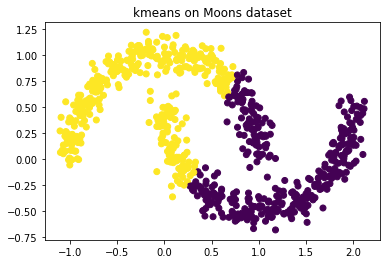

In [117]:
plt.scatter(X_moons[:,0],X_moons[:,1],c=pred_kmeans_moons)
plt.title('kmeans on Moons dataset')

In [118]:
get_perf_metrics(y_circles,kmeans_moons.labels_,X_moons)

ARI Score = -0.00
silhouette Score = 0.49
Adjusted mutual information Score = -0.00


* kmeans does not work when  the data does not have spherical well separated clusters, whereas DBSCAN does a good job in identifying clusters in such complex datasets.

* Also silhouette score is not a good metric in density based clustering data. 

## References & further reading:

References:
1. Applied Data Science in Python Course - Coursera

2. DBSCAN kgnuggets article https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html




